## Assignment 7: Data Curation and Analysis 

### Jihan Song (js97924)

In this project, I will get statistics of top 100 football players based on their fantasy points in 2022-23 season from the website (https://www.pro-football-reference.com/years/2022/fantasy.htm) and derive few insights with visualization.

Fantasy points can be earned or lost by a player by Passing, Rushing, Receving Yards and Touchdowns (TDs). 

### 1. ETL

In [97]:
from bs4 import BeautifulSoup as bs
import pandas as pd
import requests
import scipy
from matplotlib import pyplot as plt

#### 1.1 Data Extraction

From the website above, I am going to extract the data using BeautifulSoup (web-scraping API). 

code help from https://github.com/pvicks585/NFL-WebScrape/blob/main/Webscraping%20NFL%20Player%20Data.ipynb

In [98]:
page = requests.get("https://www.pro-football-reference.com/years/2022/fantasy.htm")
soup = bs(page.content, "html.parser")

In [99]:
header = [th.getText() for th in soup.findAll('tr')[1].findAll('th')]
header = header[1:]
print(header)

['Player', 'Tm', 'FantPos', 'Age', 'G', 'GS', 'Cmp', 'Att', 'Yds', 'TD', 'Int', 'Att', 'Yds', 'Y/A', 'TD', 'Tgt', 'Rec', 'Yds', 'Y/R', 'TD', 'Fmb', 'FL', 'TD', '2PM', '2PP', 'FantPt', 'PPR', 'DKPt', 'FDPt', 'VBD', 'PosRank', 'OvRank']


In [100]:
rows = soup.findAll('tr', class_ = lambda table_rows: table_rows != "thead") 
player_stats = [[td.getText() for td in rows[i].findAll('td')]
                for i in range(len(rows))]
player_stats = player_stats[2:]

In [34]:
stats = pd.DataFrame(player_stats, columns = header)
stats = stats[['Player','FantPos','Age','TD','Int','FantPt']] #Extract the columns that I am interested in & rename

In [35]:
stats.columns = ['Player', 'Position', 'Age', 'PassingTD','RushingTD','ReceivingTD','Non_passingTD','Int','Points']

#### 1.2 Data Transformation

We have to convert string into float for numerical analysis and clear all unncessary parts of strings. If there are blank, I will switch to NA and erase the row for the better analysis. 

In [101]:
import numpy as np
stats = stats.head(100)
stats = stats.replace('', np.nan, regex=True)
stats = stats.drop_duplicates()
stats = stats.dropna()

stats.head()

,Player,Position,Age,PassingTD,RushingTD,ReceivingTD,Non_passingTD,Int,Points
0,Patrick Mahomes,QB,27.0,41.0,4.0,0.0,4.0,12.0,416.0
1,Josh Jacobs,RB,24.0,0.0,12.0,0.0,12.0,0.0,275.0
2,Christian McCaffrey,RB,26.0,1.0,8.0,5.0,13.0,0.0,271.0
3,Derrick Henry,RB,28.0,1.0,13.0,0.0,13.0,0.0,270.0
4,Justin Jefferson,WR,23.0,0.0,1.0,8.0,9.0,0.0,241.0


In [102]:
def clearn_string_and_convert(s):
    try:
        s = s.replace("+","")
        s = s.replace("*","")
        s = float(s)
    except:
        None
    return s

In [103]:
stats["Player"] = stats["Player"].apply(clearn_string_and_convert)
stats["Position"] = stats["Position"].apply(clearn_string_and_convert)
stats["Age"] = stats["Age"].apply(clearn_string_and_convert)
stats["PassingTD"] = stats["PassingTD"].apply(clearn_string_and_convert)
stats["RushingTD"] = stats["RushingTD"].apply(clearn_string_and_convert)
stats["ReceivingTD"] = stats["ReceivingTD"].apply(clearn_string_and_convert)
stats["Non_passingTD"] = stats["Non_passingTD"].apply(clearn_string_and_convert)
stats["Int"] = stats["Int"].apply(clearn_string_and_convert)
stats["Points"] = stats["Points"].apply(clearn_string_and_convert)

In [105]:
stats.head()

,Player,Position,Age,PassingTD,RushingTD,ReceivingTD,Non_passingTD,Int,Points
0,Patrick Mahomes,QB,27.0,41.0,4.0,0.0,4.0,12.0,416.0
1,Josh Jacobs,RB,24.0,0.0,12.0,0.0,12.0,0.0,275.0
2,Christian McCaffrey,RB,26.0,1.0,8.0,5.0,13.0,0.0,271.0
3,Derrick Henry,RB,28.0,1.0,13.0,0.0,13.0,0.0,270.0
4,Justin Jefferson,WR,23.0,0.0,1.0,8.0,9.0,0.0,241.0


In [108]:
stats.describe()

,Age,PassingTD,RushingTD,ReceivingTD,Non_passingTD,Int,Points
count,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000
mean,26.704082,6.153061,3.091837,3.357143,6.459184,2.826531,185.867347
std,3.922468,10.589191,4.013089,3.610552,3.877422,4.751615,68.779588
min,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,85.000000
25%,24.000000,0.000000,0.000000,0.000000,4.000000,0.000000,137.750000
50%,26.000000,0.000000,1.000000,2.000000,6.000000,0.000000,168.500000
75%,28.000000,13.750000,5.000000,6.000000,9.000000,6.000000,223.500000
max,45.000000,41.000000,17.000000,14.000000,18.000000,15.000000,416.000000


#### 1.3 Data Load

Then I will save the final data into my local directory for future use.

In [106]:
stats.to_csv("FantasyFootball2022.csv")

### 2. Data Visualization 

<AxesSubplot: >

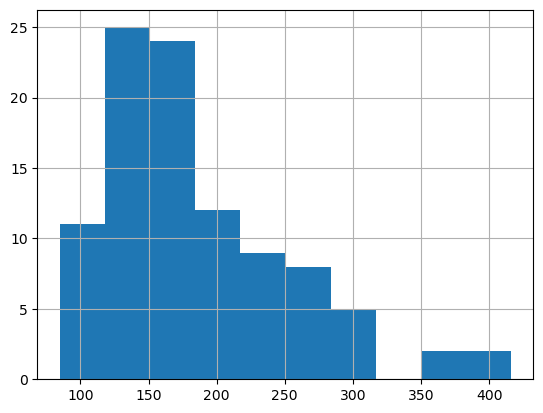

In [52]:
stats["Points"].hist(bins = 10)

<AxesSubplot: >

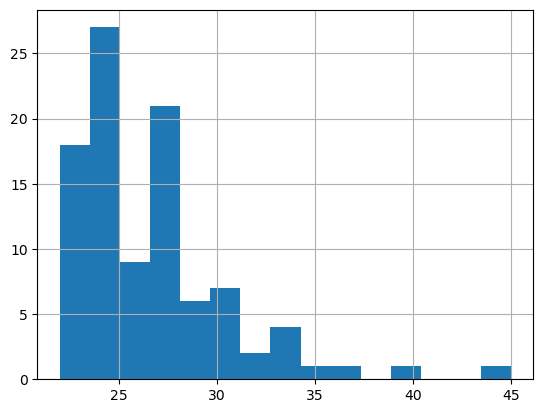

In [49]:
stats["Age"].hist(bins = 15)

From two of histograms, we could find points and age have both bell on the left side having tail on the right (skewed right).  

In [107]:
from scipy.stats import pearsonr

p = pearsonr(stats["PassingTD"],stats["Points"])
print (p[0])
p = pearsonr(stats["RushingTD"],stats["Points"])
print (p[0])
p = pearsonr(stats["Age"],stats["Points"])
print (p[0])
p = pearsonr(stats["Int"],stats["Points"])
print (p[0])

0.7131363973708613
0.4275520304144892
0.1530864701474553
0.5620252264447111


Pearson Correlation gives that...

[1] PassingTD and Points have about 0.71. This is very strong linear correlation, which makes sense since TD gives the most points. 

[2] RushingTD and Points have about 0.42. This is pretty strong linear correlation. 

[3] Age and Points have about 0.15. This is very weak correlation.

[4] Int and Points have about 0.56. This is pretty strong. This is pretty interesting considering that interception takes away your point not give.

Text(0.5, 1.0, 'Position vs. Average Points')

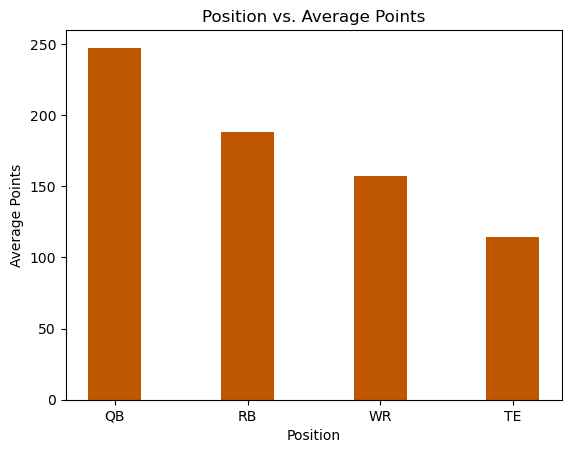

In [94]:
import matplotlib.pyplot as plt

dictionary = {"QB":[],"RB":[],"WR":[],"TE":[]}

for i in range(len(stats["Position"])):
    try:
        dictionary[stats["Position"][i]].append(stats["Points"][i])
    except:
        None
    
QB_avg = np.average(dictionary["QB"])
RB_avg = np.average(dictionary["RB"])
WR_avg = np.average(dictionary["WR"])
TE_avg = np.average(dictionary["TE"])

avg_dic = {"QB":QB_avg, "RB": RB_avg, "WR": WR_avg, "TE":TE_avg}

plt.bar(avg_dic.keys(),avg_dic.values(), color ='#BF5700', width = 0.4)

plt.xlabel("Position")
plt.ylabel("Average Points")

plt.title("Position vs. Average Points")

I calculated the average score for each position and made the bar plot. This bar plot suggests that average fantasy points for positions are ranked as QB (quarterback), RB (runningback), WR (Wide Receiver), TE (Tight End). 

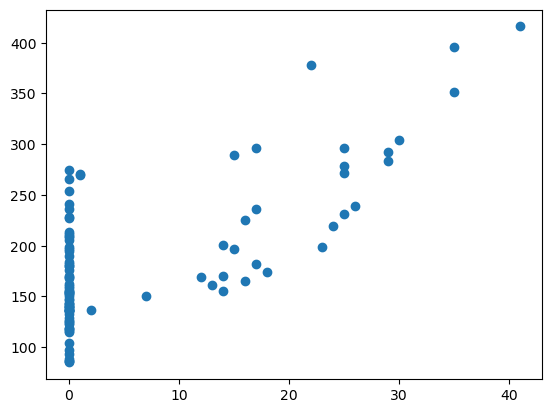

In [96]:
plt.scatter(stats["PassingTD"],stats["Points"], marker='o')

This scatter plot has two big patterns to consider. First, there is a straight line going up where passing TD is zero. This happens because there are lots of ways to acquire points without having passing TD. Second, there is a pretty strong linearity which suggests the more passingTD, the higher points were. 